In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from LQN_igraph import *
import itertools
from copy import deepcopy
import sympy as sp
from itertools import groupby

In [2]:
import igraph as ig
import hashlib

In [3]:
# def epm_process(num_system, num_ancilla):
#     graph_generator = EPM_bipartite_graph_generator_igraph(num_system, num_ancilla)
#     canonical_groups = process_and_group_by_canonical_form(graph_generator)
#     filtered_groups = filter_groups_by_scc_igraph(canonical_groups)
#     unique_bigraph = extract_unique_bigraphs_from_groups_igraph(filtered_groups)
#     return unique_bigraph

In [4]:
num_system = 3
num_ancilla = 2

In [5]:
canonical_groups = epm_process(num_system, num_ancilla)

In [13]:
total_elements = sum(len(v) for v in canonical_groups.values())  # 모든 리스트 요소 개수 합산
print(total_elements)  # 출력: 9

655


In [14]:
canonical_groups

{'5412046da0c318a980c7edbc89a98ed62e7a3dc5f8b6c5a9edfd6f9656609844': [<igraph.Graph at 0x14f156450>,
 '9a98a0100458abb4267e3e9c0d724799f7920693c9318f425aebea6789339b59': [<igraph.Graph at 0x14f156c50>,
 '22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af': [<igraph.Graph at 0x14f156d50>,
 '1f911f527de5d2bf3ab5f4e2a3ca1c9653df2adf8c53112a3b9437276a6e4916': [<igraph.Graph at 0x14f156b50>,
 '7d529fc2fb04c765eecdb1de9779eac0d8111f753df47a2788ee5113679c2782': [<igraph.Graph at 0x14f156f50>,
 '03c7aa5b9de7b327da92ef0397235030676d9e0dbb6c1f951966882a70bbf963': [<igraph.Graph at 0x14f157050>,
 '2d0ad4361fc9520493fbee367c6150c6a5f92c664fad77050ddec114cbf4430f': [<igraph.Graph at 0x14f157b50>,
 'd6d64899958ccdaab33e97e94b9db5ef7a331f098da328fab2b546fca1322252': [<igraph.Graph at 0x14f157c50>,
 '462053cef68219cc3b9878afd6c20575c9fb993716d071b0573519a7fc6c8131': [<igraph.Graph at 0x14f174850>,
 '73777a7d7a4f0c8eba6e8b7e9ab48313064ff1b15fc09b5d5d4b9545ac6ea85b': [<igraph.Graph at 0x14

In [15]:
# list(canonical_groups.keys())

In [16]:
# canonical_groups[list(canonical_groups.keys())[0]]

In [17]:
# Draw_EPM_bipartite_graph(igraph_to_networkx(canonical_groups[list(canonical_groups.keys())[0]][2]))

In [18]:
# graph_dict contains your dictionary of igraph objects
result_dict = process_graph_dict(canonical_groups)

# Accessing results
for hash_key, states in result_dict.items():
    print(f"Hash: {hash_key}")
    for state in states:
        counter, matchings, graph, index = state
        print(f"  State coefficients: {dict(counter)}")

Hash: 5412046da0c318a980c7edbc89a98ed62e7a3dc5f8b6c5a9edfd6f9656609844
  State coefficients: {'011': 1, '101': 1, '110': 1, '111': 1}
  State coefficients: {'010': 1, '100': 1, '111': 1, '110': 1}
  State coefficients: {'000': 1, '011': 1, '010': 1, '110': 1}
  State coefficients: {'010': 1, '001': 1, '000': 1, '100': 1}
Hash: 9a98a0100458abb4267e3e9c0d724799f7920693c9318f425aebea6789339b59
  State coefficients: {'011': 1, '101': 1, '110': 1, '111': 2}
  State coefficients: {'010': 1, '100': 1, '111': 1, '110': 2}
  State coefficients: {'000': 1, '011': 1, '010': 2, '110': 1}
  State coefficients: {'010': 1, '001': 1, '000': 2, '100': 1}
Hash: 22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af
  State coefficients: {'011': 1, '101': 1, '110': 1}
  State coefficients: {'010': 1, '101': 1, '111': 1}
  State coefficients: {'010': 1, '011': 1, '101': 1}
  State coefficients: {'010': 1, '100': 1, '111': 1}
  State coefficients: {'011': 1, '100': 1, '110': 1}
  State coefficien

In [19]:
result_dict

{'5412046da0c318a980c7edbc89a98ed62e7a3dc5f8b6c5a9edfd6f9656609844': [[Counter({'011': 1,
            '101': 1,
            '110': 1,
            '111': 1}),
   [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 2.0), (3, 9, 3.0), (4, 6, 3.0)],
    [(0, 6, 2.0), (1, 5, 1.0), (2, 8, 2.0), (3, 9, 3.0), (4, 7, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 5, 1.0), (3, 9, 3.0), (4, 8, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 2.0), (3, 5, 3.0), (4, 9, 3.0)]],
   0],
  [Counter({'010': 1, '100': 1, '111': 1, '110': 1}),
   [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 1.0), (3, 9, 3.0), (4, 6, 3.0)],
    [(0, 6, 2.0), (1, 5, 1.0), (2, 8, 1.0), (3, 9, 3.0), (4, 7, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 5, 2.0), (3, 9, 3.0), (4, 8, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 1.0), (3, 5, 3.0), (4, 9, 3.0)]],
   1],
  [Counter({'000': 1, '011': 1, '010': 1, '110': 1}),
   [[(0, 5, 1.0), (1, 6, 1.0), (2, 8, 1.0), (3, 9, 3.0), (4, 7, 3.0)],
    [(0, 5, 1.0), (1, 7, 2.0), (2, 6, 2.0), (3, 9, 3.0), (4, 8, 3.0)],
    [(0,

In [29]:
# 예제 2: 여러 상태 검색 (특정 비트 위치만 플립)
target_states = ['000', '100', '110']
results = check_quantum_states_with_bit_flips(result_dict, target_states, bit_flip_positions=None)


In [31]:
results[0]

('5412046da0c318a980c7edbc89a98ed62e7a3dc5f8b6c5a9edfd6f9656609844',
 0,
 Counter({'011': 1, '101': 1, '110': 1, '111': 1}),
 [1, 2],
 {'011': 1, '111': 1, '101': 1})

In [33]:
import pickle

def save_results_pickle(result_dict, filename):
    """
    Save analysis results to a pickle file.
    
    Parameters:
    -----------
    result_dict : dict
        Result dictionary from process_graph_dict()
    filename : str
        Path to save the pickle file
    """
    with open(filename, 'wb') as f:
        pickle.dump(result_dict, f)
    
def load_results_pickle(filename):
    """
    Load saved analysis results from a pickle file.
    
    Parameters:
    -----------
    filename : str
        Path to the pickle file
        
    Returns:
    --------
    dict
        Loaded results dictionary with all original data
    """
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [34]:
# After completing your analysis
result_dict = process_graph_dict(canonical_groups)

# Save the complete results
save_results_pickle(result_dict, "quantum_states_full.pkl")

# Later, load the results
loaded_results = load_results_pickle("quantum_states_full.pkl")

# Continue analysis with the loaded results
states_to_find = ['000', '001', '010', '100']
state_results = check_quantum_states_exist(loaded_results, states_to_find)

In [36]:
state_results[0]

('5412046da0c318a980c7edbc89a98ed62e7a3dc5f8b6c5a9edfd6f9656609844',
 {'000': 1, '001': 1, '010': 1, '100': 1},
 3)

In [20]:
# Continue analysis with the loaded results
states_to_find = ['000','111']
state_results = check_quantum_states_exist(loaded_results, states_to_find)

In [22]:
state_results

[('22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af',
  {'000': 1, '111': 1},
  9),
 ('22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af',
  {'000': 1, '111': 1},
  10),
 ('1f911f527de5d2bf3ab5f4e2a3ca1c9653df2adf8c53112a3b9437276a6e4916',
  {'000': 1, '111': 1},
  9),
 ('1f911f527de5d2bf3ab5f4e2a3ca1c9653df2adf8c53112a3b9437276a6e4916',
  {'000': 1, '111': 1},
  10),
 ('7d529fc2fb04c765eecdb1de9779eac0d8111f753df47a2788ee5113679c2782',
  {'000': 1, '111': 1},
  12),
 ('03c7aa5b9de7b327da92ef0397235030676d9e0dbb6c1f951966882a70bbf963',
  {'000': 1, '111': 1},
  12),
 ('03c7aa5b9de7b327da92ef0397235030676d9e0dbb6c1f951966882a70bbf963',
  {'000': 1, '111': 1},
  13),
 ('462053cef68219cc3b9878afd6c20575c9fb993716d071b0573519a7fc6c8131',
  {'000': 1, '111': 1},
  5),
 ('73777a7d7a4f0c8eba6e8b7e9ab48313064ff1b15fc09b5d5d4b9545ac6ea85b',
  {'000': 1, '111': 1},
  8),
 ('73777a7d7a4f0c8eba6e8b7e9ab48313064ff1b15fc09b5d5d4b9545ac6ea85b',
  {'000': 1, '111': 1},
 

In [23]:
# Continue analysis with the loaded results
states_to_find = ['000', '111']
state_results = check_quantum_states_exist(loaded_results, states_to_find)

In [24]:
state_results

[('22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af',
  {'000': 1, '111': 1},
  9),
 ('22698ea5a87cccad8ec04918ae76b00be7c4e1ab28820bfd29a9bbc5d13ea8af',
  {'000': 1, '111': 1},
  10),
 ('1f911f527de5d2bf3ab5f4e2a3ca1c9653df2adf8c53112a3b9437276a6e4916',
  {'000': 1, '111': 1},
  9),
 ('1f911f527de5d2bf3ab5f4e2a3ca1c9653df2adf8c53112a3b9437276a6e4916',
  {'000': 1, '111': 1},
  10),
 ('7d529fc2fb04c765eecdb1de9779eac0d8111f753df47a2788ee5113679c2782',
  {'000': 1, '111': 1},
  12),
 ('03c7aa5b9de7b327da92ef0397235030676d9e0dbb6c1f951966882a70bbf963',
  {'000': 1, '111': 1},
  12),
 ('03c7aa5b9de7b327da92ef0397235030676d9e0dbb6c1f951966882a70bbf963',
  {'000': 1, '111': 1},
  13),
 ('462053cef68219cc3b9878afd6c20575c9fb993716d071b0573519a7fc6c8131',
  {'000': 1, '111': 1},
  5),
 ('73777a7d7a4f0c8eba6e8b7e9ab48313064ff1b15fc09b5d5d4b9545ac6ea85b',
  {'000': 1, '111': 1},
  8),
 ('73777a7d7a4f0c8eba6e8b7e9ab48313064ff1b15fc09b5d5d4b9545ac6ea85b',
  {'000': 1, '111': 1},
 

In [25]:
# Continue analysis with the loaded results
states_to_find = ['000', '100', '110', '101', '111']
state_results = check_quantum_states_exist(loaded_results, states_to_find)

In [26]:
state_results

[]

In [27]:
def filter_by_state_count(result_dict, min_states=None, max_states=None, exact_states=None, hash_key=None):
    """
    Filter results to include only those with a specific number of quantum states.
    
    Parameters:
    -----------
    result_dict : dict
        Result dictionary from process_graph_dict()
    min_states : int, optional
        Minimum number of states required (default: None)
    max_states : int, optional
        Maximum number of states allowed (default: None)
    exact_states : int, optional
        Exact number of states required (default: None)
    hash_key : str, optional
        Specific hash key to filter within (default: None, filter all hashes)
        
    Returns:
    --------
    dict
        Filtered results dictionary with the same structure as the input
    """
    filtered_results = {}
    
    # Determine which hash keys to process
    if hash_key is not None:
        if hash_key not in result_dict:
            return {}
        hash_keys = [hash_key]
    else:
        hash_keys = result_dict.keys()
    
    # Process each hash key
    for key in hash_keys:
        filtered_list = []
        
        for state_data in result_dict[key]:
            counter = state_data[0]  # State coefficient Counter
            num_states = len(counter)
            
            # Check if number of states meets the criteria
            matches = True
            if exact_states is not None:
                matches = (num_states == exact_states)
            else:
                if min_states is not None and num_states < min_states:
                    matches = False
                if max_states is not None and num_states > max_states:
                    matches = False
            
            # Add to filtered results if it matches
            if matches:
                filtered_list.append(state_data)
        
        # Only add to results if there are filtered items
        if filtered_list:
            filtered_results[key] = filtered_list
    
    return filtered_results

In [28]:
# Get results with exactly 3 states
results_with_5_states = filter_by_state_count(result_dict, exact_states=5)

In [29]:
results_with_5_states

{'5587d9b9c6f7504e7af081dc6dc6439e722021b5ddfb413cdb655841a463b823': [[Counter({'010': 1,
            '011': 1,
            '101': 1,
            '110': 1,
            '111': 1}),
   [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 1.0), (3, 6, 3.0), (4, 9, 3.0)],
    [(0, 5, 1.0), (1, 7, 2.0), (2, 9, 2.0), (3, 8, 3.0), (4, 6, 3.0)],
    [(0, 6, 2.0), (1, 5, 1.0), (2, 9, 2.0), (3, 8, 3.0), (4, 7, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 1.0), (3, 5, 3.0), (4, 9, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 9, 2.0), (3, 8, 3.0), (4, 5, 3.0)]],
   4],
  [Counter({'010': 1, '011': 1, '100': 1, '110': 1, '111': 1}),
   [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 1.0), (3, 9, 3.0), (4, 6, 3.0)],
    [(0, 5, 1.0), (1, 7, 2.0), (2, 9, 2.0), (3, 6, 3.0), (4, 8, 3.0)],
    [(0, 6, 2.0), (1, 5, 1.0), (2, 8, 1.0), (3, 9, 3.0), (4, 7, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 1.0), (3, 9, 3.0), (4, 5, 3.0)],
    [(0, 6, 2.0), (1, 7, 2.0), (2, 9, 2.0), (3, 5, 3.0), (4, 8, 3.0)]],
   5],
  [Counter({'001': 1, '010': 1

In [30]:
list(results_with_5_states.keys())

['5587d9b9c6f7504e7af081dc6dc6439e722021b5ddfb413cdb655841a463b823',
 '9496a904def228b4fe1d5f38b12b5242a3737c9b1978f70e08765e9d7ab0457d',
 'af4b603880cfe91a9dcd9c6fdd1208d9c04c31029a98910acab11e2d6f727bef',
 '8b60c5a093c977bd1e61dc2837a0b37cf116dafdf9873aa789fab6fdabc356d2',
 '76e52096700a8c90dfc783d2cfbe0b2e8febb89aef5a3e7e6d5c5fa3ac4d8563',
 'e474ff802595d904695fc2ba883918863e07782c971e9ebc45a67cf40545550a',
 '4c946217bde3ca200b14c08ec1bc5a3afea6bac41469fd141b02c76d50bd36c6',
 '665b5df4aa3b446467bb571e14069616f3fa89a768c4c6196bf2d300699bf036',
 '4ebe3a78729a557ec2fefeafe46ac58a822df8eec1157732a35bd60f9280d860']

In [31]:
results_with_5_states[list(results_with_5_states.keys())[1]]

[[Counter({'010': 1, '011': 1, '101': 1, '110': 1, '111': 1}),
  [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 1.0), (3, 6, 3.0), (4, 9, 3.0)],
   [(0, 5, 1.0), (1, 7, 2.0), (2, 9, 2.0), (3, 6, 3.0), (4, 8, 3.0)],
   [(0, 6, 2.0), (1, 5, 1.0), (2, 9, 2.0), (3, 8, 3.0), (4, 7, 3.0)],
   [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 1.0), (3, 5, 3.0), (4, 9, 3.0)],
   [(0, 6, 2.0), (1, 7, 2.0), (2, 9, 2.0), (3, 5, 3.0), (4, 8, 3.0)]],
  0],
 [Counter({'010': 1, '011': 1, '100': 1, '110': 1, '111': 1}),
  [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 1.0), (3, 6, 3.0), (4, 9, 3.0)],
   [(0, 5, 1.0), (1, 7, 2.0), (2, 9, 2.0), (3, 6, 3.0), (4, 8, 3.0)],
   [(0, 6, 2.0), (1, 5, 1.0), (2, 8, 1.0), (3, 9, 3.0), (4, 7, 3.0)],
   [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 1.0), (3, 5, 3.0), (4, 9, 3.0)],
   [(0, 6, 2.0), (1, 7, 2.0), (2, 9, 2.0), (3, 5, 3.0), (4, 8, 3.0)]],
  1],
 [Counter({'001': 1, '010': 1, '011': 1, '110': 1, '111': 1}),
  [[(0, 5, 1.0), (1, 6, 1.0), (2, 9, 2.0), (3, 8, 3.0), (4, 7, 3.0)],
   [(0, 5, 1.0), (1, 7, 2.0

In [32]:
def get_unique_states_with_count(result_dict, state_count, hash_key=None):
    """
    Extract unique quantum states that have exactly the specified count.
    
    Parameters:
    -----------
    result_dict : dict
        Result dictionary from process_graph_dict()
    state_count : int
        Exact number of unique quantum states to filter for
    hash_key : str, optional
        Specific hash key to search within (default: None, search all hashes)
        
    Returns:
    --------
    list
        List of unique dictionaries, each containing state:coefficient pairs
        Example: [{'010': 1, '101': 2}, {'000': 1, '111': 1}, ...]
    """
    state_dictionaries = []
    seen_states = set()
    
    # Determine which hash keys to process
    if hash_key is not None:
        if hash_key not in result_dict:
            return []
        hash_keys = [hash_key]
    else:
        hash_keys = result_dict.keys()
    
    # Process each hash key
    for key in hash_keys:
        for state_data in result_dict[key]:
            counter = state_data[0]  # State coefficient Counter
            
            # Check if number of states equals the required count
            if len(counter) == state_count:
                # Convert counter to a hashable representation for deduplication
                counter_tuple = tuple(sorted(counter.items()))
                
                # Only add if we haven't seen this state combination before
                if counter_tuple not in seen_states:
                    seen_states.add(counter_tuple)
                    state_dictionaries.append(dict(counter))
    
    return state_dictionaries

In [33]:
# 정확히 5개의 고유한 양자 상태를 가진 결과 얻기
unique_five_state_results = get_unique_states_with_count(result_dict, 5)

# 결과 출력 (중복 없음)
for i, state_dict in enumerate(unique_five_state_results):
    print(f"\n고유 상태 집합 #{i+1}:")
    print(state_dict)  # {'010': 1, '011': 1, '101': 1, '110': 1, '111': 1}


고유 상태 집합 #1:
{'010': 1, '011': 1, '101': 1, '110': 1, '111': 1}

고유 상태 집합 #2:
{'010': 1, '011': 1, '100': 1, '110': 1, '111': 1}

고유 상태 집합 #3:
{'001': 1, '010': 1, '011': 1, '110': 1, '111': 1}

고유 상태 집합 #4:
{'000': 1, '010': 1, '011': 1, '110': 1, '111': 1}

고유 상태 집합 #5:
{'000': 1, '001': 1, '010': 1, '011': 1, '111': 1}

고유 상태 집합 #6:
{'000': 1, '001': 1, '010': 1, '011': 1, '110': 1}

고유 상태 집합 #7:
{'011': 1, '000': 1, '001': 1, '100': 1, '101': 1}

고유 상태 집합 #8:
{'010': 1, '000': 1, '001': 1, '100': 1, '101': 1}

고유 상태 집합 #9:
{'010': 1, '011': 1, '101': 1, '110': 1, '111': 2}

고유 상태 집합 #10:
{'010': 1, '011': 1, '100': 1, '110': 2, '111': 1}

고유 상태 집합 #11:
{'001': 1, '010': 1, '011': 2, '110': 1, '111': 1}

고유 상태 집합 #12:
{'000': 1, '010': 2, '011': 1, '110': 1, '111': 1}

고유 상태 집합 #13:
{'000': 1, '001': 1, '010': 1, '011': 2, '111': 1}

고유 상태 집합 #14:
{'000': 1, '001': 1, '010': 2, '011': 1, '110': 1}

고유 상태 집합 #15:
{'011': 1, '000': 1, '001': 2, '100': 1, '101': 1}

고유 상태 집합 #16:
{'01

In [34]:
def filter_states_containing(state_list, target_states):
    """
    Filter state dictionaries to only those containing the specified target states.
    
    Parameters:
    -----------
    state_list : list
        List of state dictionaries (from get_unique_states_with_count)
    target_states : list or str
        Specific state(s) that must be present in the dictionaries
        
    Returns:
    --------
    list
        Filtered list of state dictionaries that contain all target states
    """
    # Convert single state to list for consistent processing
    if isinstance(target_states, str):
        target_states = [target_states]
    
    filtered_results = []
    
    for state_dict in state_list:
        # Check if all target states exist in this dictionary
        if all(state in state_dict for state in target_states):
            filtered_results.append(state_dict)
    
    return filtered_results

In [37]:
# 먼저 5개의 고유한 양자 상태를 가진 상태 사전 목록을 얻음
five_state_results = get_unique_states_with_count(result_dict, 5)

# 그 중에서 '010'과 '111' 상태를 모두 포함하는 결과만 필터링
filtered_results = filter_states_containing(five_state_results, ['000', '111', '011', '001'])

# 결과 출력
for i, state_dict in enumerate(filtered_results):
    print(f"\n결과 #{i+1}:")
    print(state_dict)  # 예: {'010': 1, '011': 2, '111': 1, '110': 1, '101': 1}

# # 단일 상태 검색도 가능
# has_010_state = filter_states_containing(five_state_results, '010')


결과 #1:
{'000': 1, '001': 1, '010': 1, '011': 1, '111': 1}

결과 #2:
{'000': 1, '001': 1, '010': 1, '011': 2, '111': 1}

결과 #3:
{'000': 1, '001': 2, '010': 1, '011': 1, '111': 1}

결과 #4:
{'000': 1, '001': 2, '010': 1, '011': 2, '111': 1}

결과 #5:
{'000': 1, '001': 1, '011': 1, '110': 1, '111': 1}

결과 #6:
{'000': 1, '001': 1, '011': 1, '110': 1, '111': 2}

결과 #7:
{'000': 1, '001': 2, '011': 1, '110': 1, '111': 1}

결과 #8:
{'000': 1, '001': 2, '011': 1, '110': 1, '111': 2}


In [22]:
result_dict[list(result_dict.keys())[0]][0]

[Counter({'011': 1, '101': 1, '110': 1, '111': 1}),
 [[(0, 5, 1.0), (1, 7, 2.0), (2, 8, 2.0), (3, 9, 3.0), (4, 6, 3.0)],
  [(0, 6, 2.0), (1, 5, 1.0), (2, 8, 2.0), (3, 9, 3.0), (4, 7, 3.0)],
  [(0, 6, 2.0), (1, 7, 2.0), (2, 5, 1.0), (3, 9, 3.0), (4, 8, 3.0)],
  [(0, 6, 2.0), (1, 7, 2.0), (2, 8, 2.0), (3, 5, 3.0), (4, 9, 3.0)]],
 0]

In [23]:
result_dict[list(result_dict.keys())[0]][0][2]

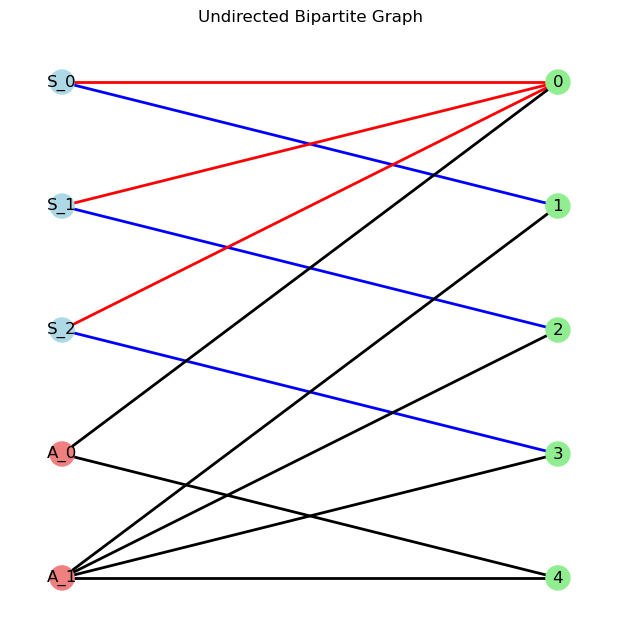

In [24]:
Draw_EPM_bipartite_graph(igraph_to_networkx(result_dict[list(result_dict.keys())[0]][0][2]))

In [26]:
target = ['011', '101', '110']

In [17]:
state_results = check_quantum_states_exist(result_dict, target)

In [22]:
state_results

[('218e6398a9fa515ded106c4cffca4e4cd8b0055519fe788c78516ac7d2a102f8',
  {'011': 1, '101': 1, '110': 1},
  0),
 ('a2b0625305e51c00c5048d17e1a280ff7795dffe1aa358d5676a595e144bb28a',
  {'011': 1, '101': 1, '110': 1},
  0)]